# Task
### Objective
 To categorize the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.
Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.

### Task:
1. use K-means clustering and Hierarchical clustering to cluster the country into groups.
please choose the number of the cluster in a rational reason
2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively
3. please write the suggestion to CEO about the country you suggest

In [67]:
#IMPORTS
import numpy as np
import pandas as pd

#Create dataframe
df  = pd.read_csv("country.csv")

# Set up
### Data cleaning

In [68]:
#Check for null cells
df.isnull().sum()

#No null cells, can continue

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [69]:
#Sanity checks
df.describe()



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,37.905960,40.447013,6.790530,46.351430,17899.423841,7.857536,70.774172,2.934305,13636.324503
std,40.749021,28.196914,2.781353,24.614163,19801.730058,10.973978,9.011529,1.512132,18766.269648
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.850000,22.800000,4.850000,29.950000,3850.000000,1.730000,65.450000,1.820000,1485.000000
50%,19.100000,34.800000,6.220000,43.000000,10400.000000,5.140000,73.400000,2.410000,5020.000000
75%,60.400000,50.950000,8.690000,57.500000,26200.000000,10.350000,77.000000,3.750000,16850.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Having a country with average life expectancy of 32 seems quite low but could be plausible. There is no country with child mortality per 1000 over 1000. Data seems fine. 

### Preprocessing

In [70]:
#Ignore column "country" cause it is not numeric and therefore can't be used for clustering.
numeric_col = ["child_mort", "exports" ,"health" ,"imports","income","inflation","life_expec","total_fer","gdpp"]
df_num = df[numeric_col]
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


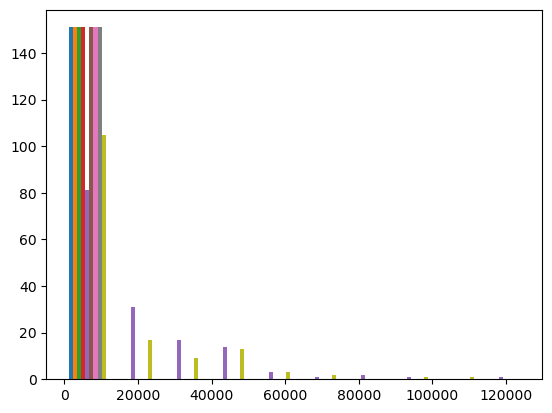

In [71]:
#Visualize pre-scaled features by showing histogram
import matplotlib.pyplot as plt
plt.hist(df_num, bins=10)
plt.show()

In [72]:
#Scale data
#Data needs to be scaled so distance can be calculated correctly (because GDP is much larger than life expectancy for example)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#fit and transform data
scaled = scaler.fit_transform(df_num)
#turn transformed data back into a dataframe
df_scaled = pd.DataFrame(scaled, columns=df_num.columns)


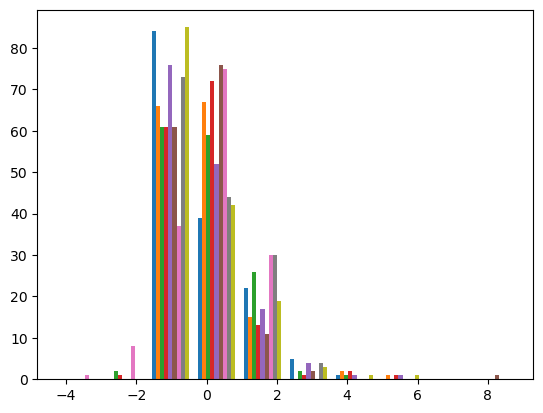

In [73]:
#Visualize scaled features by showing histogram
plt.hist(df_scaled, bins=10)
plt.show()

# 1: K-means clustering & Hierarchical clustering


## Find optimal number of clusters using Elbow method


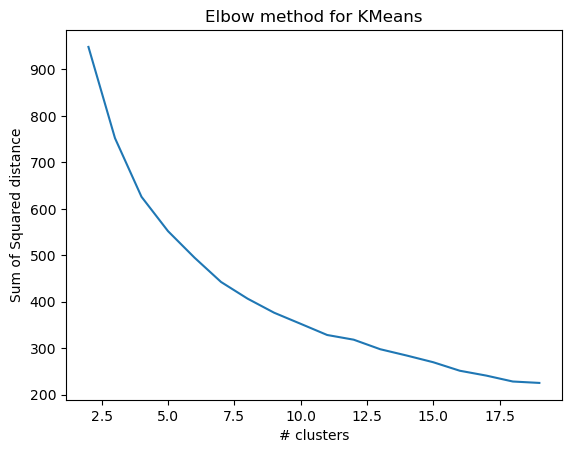

In [74]:
from sklearn.cluster import KMeans

sums_Squared_Dis=[]
#Try out anything between 2 and 10 clusters
K=range(2,20)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_scaled)
    #record how much the sum of squared distances is
    sums_Squared_Dis.append(kmean.inertia_)
    
plt.plot(K,sums_Squared_Dis)
plt.title("Elbow method for KMeans")
plt.xlabel('# clusters')
plt.ylabel('Sum of Squared distance')
plt.show()



## Find optimal number of clusters using silhouette score
The elbow method did not result in a obvious choice for a number of clusters. Therefore let's try to find the number of clusters with the best silhouette score. With this score we can also determine the optimal number of clusters for hierarchical clustering. 



In [75]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


km_silhouette_scores = []
hc_silhouette_scores = []

# Calculate silhouette score for each value of k
for i in K:
    #K-MEANS
    kmeans = KMeans(n_clusters=i)
    km_cluster_labels = kmeans.fit_predict(df_scaled)
    km_silhouette_scores.append(silhouette_score(df_scaled, km_cluster_labels))
    #HIERARCHICAL
    hierarchical = AgglomerativeClustering(n_clusters=i)
    hc_cluster_labels = hierarchical.fit_predict(df_scaled)
    hc_silhouette_scores.append(silhouette_score(df_scaled, hc_cluster_labels))




print(km_silhouette_scores)
print(hc_silhouette_scores)



[0.2904688023861167, 0.2779707425557981, 0.28854616291183904, 0.302349945491919, 0.2255273938676809, 0.24303615473877418, 0.2206139728790723, 0.2323098830273425, 0.20612744239579134, 0.20319001856499455, 0.224594906795887, 0.19841906954023927, 0.19445793108733406, 0.20709878246925417, 0.1911565170980887, 0.20035321334093562, 0.19172733249784069, 0.19562331483493073]
[0.3119522637947652, 0.2703066845392547, 0.27448228176881945, 0.2034899323651637, 0.21285376764306047, 0.24380793055083008, 0.2537538915815637, 0.20642634407094687, 0.2057522421374662, 0.21368829035930906, 0.21605385722418954, 0.2188536973006313, 0.22131738403353418, 0.2195091947019016, 0.21300636307305157, 0.2031885284714782, 0.20062027336401167, 0.20938800799758395]


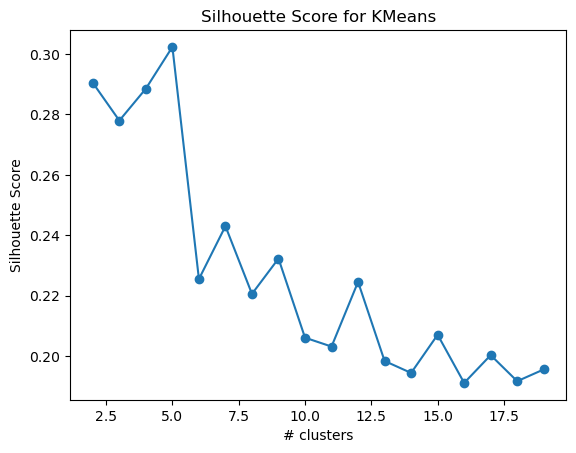

In [76]:
# Plot silhouette scores for k means
plt.plot(K, km_silhouette_scores, marker='o')
plt.title("Silhouette Score for KMeans")
plt.xlabel('# clusters')
plt.ylabel('Silhouette Score')
plt.show()

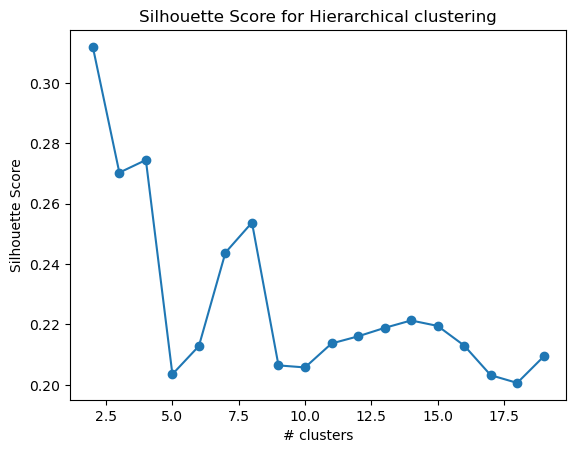

In [77]:
# Plot silhouette scores for hierarchical clustering
plt.plot(K, hc_silhouette_scores, marker='o')
plt.title("Silhouette Score for Hierarchical clustering")
plt.xlabel('# clusters')
plt.ylabel('Silhouette Score')
plt.show()

It seems like the best silhouette score is at 5 clusters with k-means clustering (Silhouette score is around 0.303). Using hierarchical clustering, we could get the score even better, but only at two clusters. Having only two clusters is too little information for our objective however. 

# Make actual clustering

## K-Means Clustering

In [78]:
kmeans_predictor = KMeans(n_clusters=5)
kmeans_labels = kmeans_predictor.fit_predict(df_scaled)
print(kmeans_labels)

[0 3 3 2 3 2 1 1 1 3 3 1 1 3 3 1 3 1 1 1 3 3 1 3 1 1 1 2 1 1 1 1 3 1 1 3 1
 1 1 1 2 3 1 2 2 2 3 3 2 1 3 3 3 1 2 1 2 2 1 1 1 3 1 1 1 2 3 3 2 2 1 3 1 1
 1 1 4 0 2 2 1 3 1 3 3 1 2 1 2 1 1 3 1 2 1 4 1 2 1 1 3 3 1 2 2 3 1 1 1 2 1
 4 1 1 3 1 1 2 2 3 1 2 3 1 1 1 3 3 1 1 3 1 1 3 3 3 1 1 1 2 2 1 3 0 1 3 2 1
 1 1 1]


## Hierarchical clustering

In [79]:
hierarchical_predictor = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical_predictor.fit_predict(df_scaled)
print(hierarchical_labels)

[0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0]


# 2: PCA and Visualization


In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_scaled)

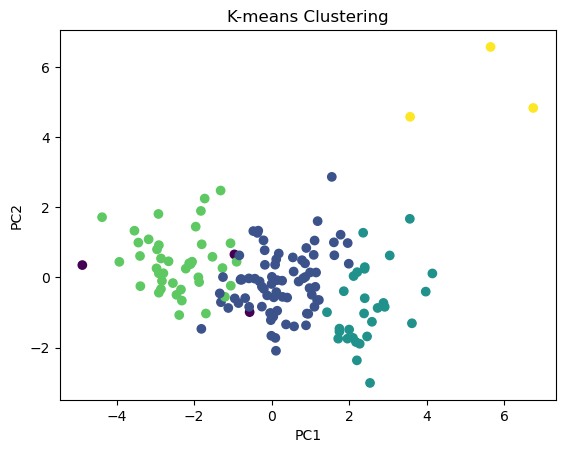

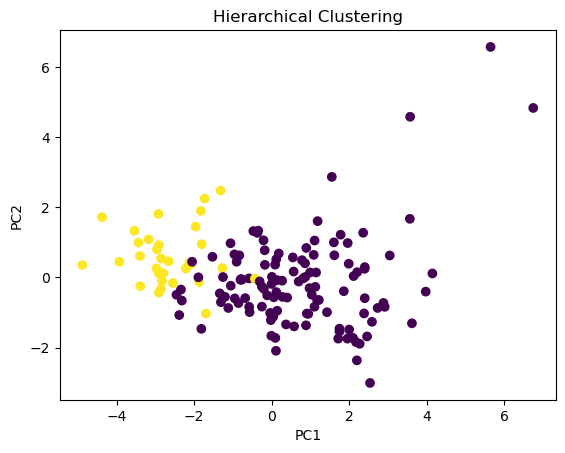

In [81]:
# Plot K-means clusters
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=kmeans_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()

# Plot Hierarchical clusters
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=hierarchical_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')
plt.show()

# Analysis

Now we should check if these clusters actually make sense with the data provided. Just like in the data source, we should first check which features are correlated.

<AxesSubplot:>

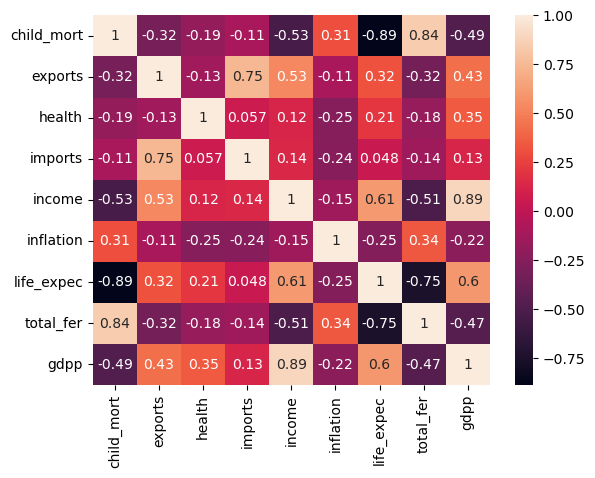

In [82]:
import seaborn as sns

#correlation 
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

It seems like just like in the original dataset, gdpp and income are highly positively correlated and life_expec and child_mort are highly negatively correlated.
Now we can plot our 5 k-means clusters against gdpp and child mortality. 

In [83]:
#use the original dataframe with the country names and append the cluster that was calculated once with k-means and once with hierarchical clustering
df_clustered = pd.DataFrame(df)
df_clustered['KMeans_Cluster'] = kmeans_labels
df_clustered['Hierarchical_Cluster'] = hierarchical_labels

df_clustered.head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,0,0
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,3,0
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,3,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,2,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,3,1


c:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


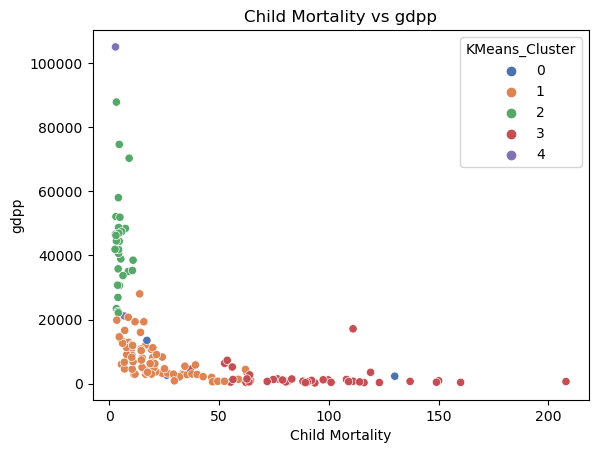

In [84]:
#K-Means clusters visualized in gdpp vs. child mortality
sns.scatterplot(df_clustered['child_mort'],df_clustered['gdpp'],hue='KMeans_Cluster',data=df_clustered,  palette="deep") 
plt.title("Child Mortality vs gdpp")
plt.xlabel("Child Mortality")
plt.ylabel("gdpp")
plt.show()

c:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


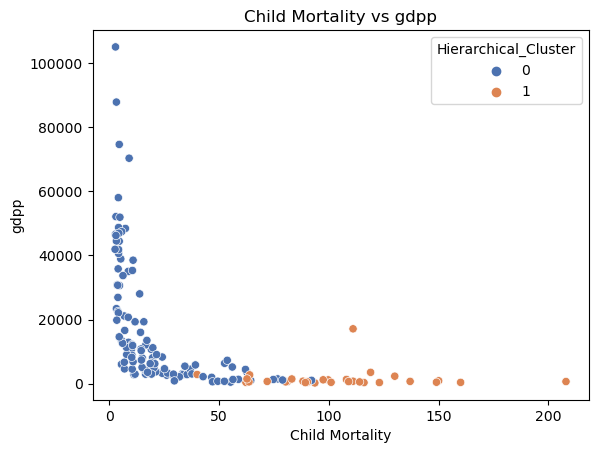

In [85]:
#Hierarchical clusters visualized in gdpp vs. child mortality
sns.scatterplot(df_clustered['child_mort'],df_clustered['gdpp'],hue='Hierarchical_Cluster',data=df_clustered, palette="deep") 
plt.title("Child Mortality vs gdpp")
plt.xlabel("Child Mortality")
plt.ylabel("gdpp")
plt.show()

Here we can see that the clusters are also near each other on the plot of child mortality vs gdpp.
From now on we will only continue working with the 5 k-means clusters, since having only two clusters is not nuanced enough to make a decision on how to spread funds.

c:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


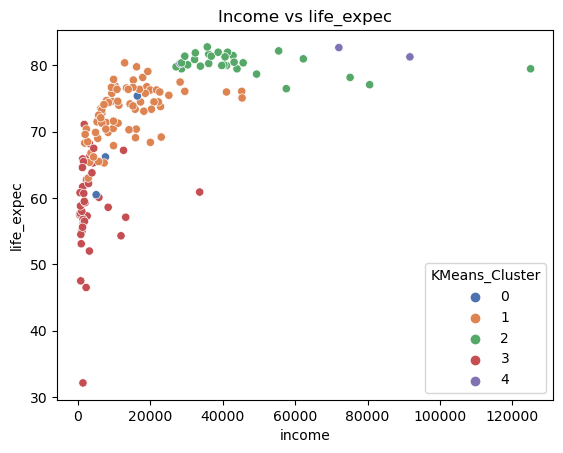

In [86]:
#K-Means clusters visualized in income vs. life_expec
df_scaled['KMeans_Cluster'] = kmeans.labels_
sns.scatterplot(df_clustered['income'],df_clustered['life_expec'],hue='KMeans_Cluster',data=df_clustered,  palette="deep") 
plt.title("Income vs life_expec")
plt.xlabel("income")
plt.ylabel("life_expec")
plt.show()

Again we see that same cluster faring quite badly with a low life expectancy and low income. Now we need to find out which countries are in which cluster.

In [87]:
#save to file
df_clustered.to_csv('results.csv',index=False)

In [92]:
display(df_clustered)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,0,0
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480,3,0
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,3,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,0
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,1,0
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,1,0
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,1,0


In [93]:

most_need = df_clustered[df_clustered['KMeans_Cluster']==3]['country']
some_need = df_clustered[df_clustered['KMeans_Cluster']==1]['country']
some_need2 = df_clustered[df_clustered['KMeans_Cluster']==0]['country']
least_need = df_clustered[df_clustered['KMeans_Cluster']==2]['country']
least_need2 = df_clustered[df_clustered['KMeans_Cluster']==4]['country']


In [94]:
print(most_need)


1                         Sudan
2                        Malawi
4              Congo, Dem. Rep.
9                       Lesotho
10                      Burundi
13                   Mauritania
14                     Pakistan
16                        Kenya
20                 Sierra Leone
21                  Timor-Leste
23                      Comoros
32                   Madagascar
35                        Benin
41                      Eritrea
46                         Iraq
47                     Cameroon
50                       Uganda
51                     Botswana
52                  Afghanistan
61                        Haiti
66                       Gambia
67                        Ghana
71                       Rwanda
81                 South Africa
83                  Congo, Rep.
84                   Mozambique
91                         Chad
100                      Guinea
101                       Niger
105                      Angola
114                     Liberia
119     

# 3: Suggestion
Using k-means clustering for data analysis, 5 clusters of countries, grouped by socio-economic and health factors have emerged.
Data analysis has identified one cluster of countries that are performing very badly in the developmental metrics. Their performance is so far behind other clusters of countries that I recommend we spread all of the funds evenly between the countries in the above mentioned cluster with the worst factors:

Sudan,
Malawi,
Congo, Dem. Rep.,
Lesotho,
Burundi,
Mauritania,
Pakistan,
Kenya,
Sierra Leone,
Timor-Leste,
Comoros,
Madagascar,
Benin,
Eritrea,
Iraq,
Cameroon,
Uganda,
Botswana,
Afghanistan,
Micronesia, Fed. Sts.,
Haiti,
Gambia,
Ghana,
Rwanda,
South Africa,
Congo, Rep.,
Mozambique,
Chad,
Guinea,
Niger,
Angola,
Liberia,
Yemen,
Tanzania,
Lao,
Namibia,
Kiribati,
Zambia,
Guinea-Bissau,
Mali,
Central African Republic,
Equatorial Guinea
